# Base de dados - Mall Customers segmentation
fonte: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# 1. Importação de bibliotecas

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans


# 2. Carregamento de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/mall_customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Exploração de dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Não há valores faltantes

In [ ]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

A maior idade ("Age") é de 70 anos e a menor idade é de 18 anos. O maior rendimento anual  ("Annual Income") foi de 137000 e o menor de 15000 com desvio padrão de 26264. Já em relação ao score de gastos ("Spending Score"), o menor foi 1 e o máximo foi 99, lembrando que vai de 1 a 100.

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#4. Visualização de dados

Pela gráfico, há algum ou alguns valores acima de 120, mas não serão considerados como 'outliers'.

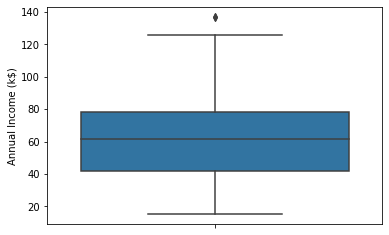

In [ ]:
#plt.figure(figsize=(15,5))

sns.boxplot(data=data, y="Annual Income (k$)")
plt.show()

São quatro valores acima de 120

In [ ]:
data[data["Annual Income (k$)"]>120]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Neste atributo não se vê 'outliers'.

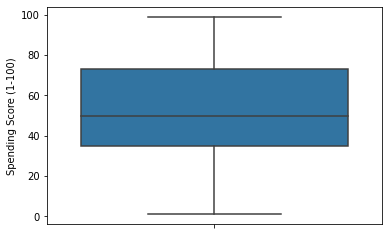

In [ ]:
sns.boxplot(data=data,y="Spending Score (1-100)")
plt.show()

A maior faixa etária é de 30 a 35 anos e a menor de 55 a 70 anos.

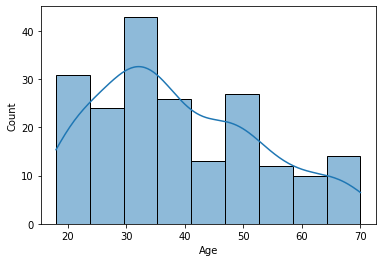

In [ ]:
sns.histplot(data =data['Age'], kde=True);

O maior volume de rendimento anual está na faixa de 50 a 80 e o menor entre 90 a 140

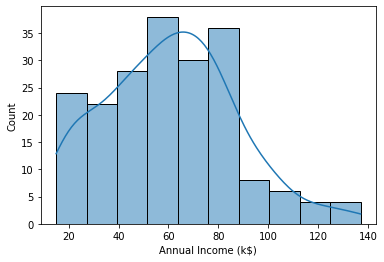

In [ ]:
sns.histplot(data=data['Annual Income (k$)'], kde=True);

O Score mais recorrente está entre 40 a 50.

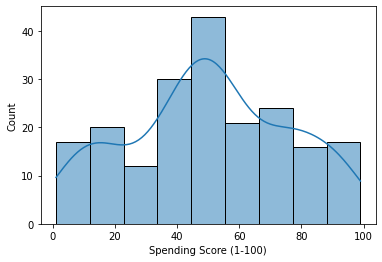

In [ ]:
sns.histplot(data=data['Spending Score (1-100)'], kde=True);

Até 35 anos o Score é mais alto que depois dos 35 anos. O gênero não tem influência significativa no Score.

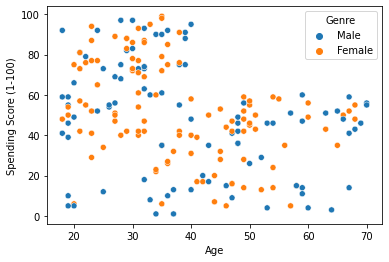

In [ ]:
sns.scatterplot(data=data, x= 'Age', y='Spending Score (1-100)', hue='Genre')

# 5. Machine Learning - Treinamento não supervisionado

Será utilizado somente dois atributos: 'Annual Income (k$)' e 'Spending Score (1-100)', que são os que provavelmente influenciam mais para a segmentação.

In [ ]:
X_train = data[['Annual Income (k$)','Spending Score (1-100)']]
X_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
sX = pp.StandardScaler()
X_train.loc[:,:] = sX.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Pelo gráfico, conclui-se que o número de clusters ideal são cinco.

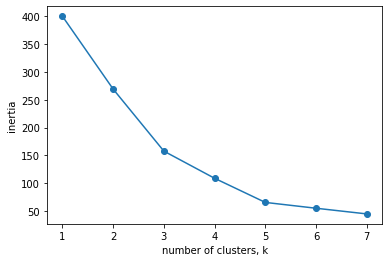

In [ ]:
ks = range(1, 8)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
model = KMeans(n_clusters=5)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_train)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels})


# Display ct
print(df)

     labels
0         3
1         2
2         3
3         2
4         3
..      ...
195       4
196       0
197       4
198       0
199       4

[200 rows x 1 columns]


In [ ]:
data2 = data.copy()

In [ ]:
data2 = pd.concat([data2, df], axis=1)

In [ ]:
data2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


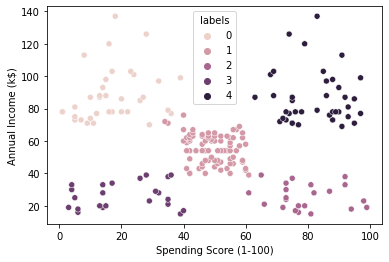

In [ ]:
sns.scatterplot(data =data2, y= 'Annual Income (k$)', x='Spending Score (1-100)', hue='labels' )


# 6. Conclusão
Conclui-se que realmente os dois atributos usados são suficientes para determinar a segmentação. Pelo gráfico é possível verificar que há cinco grupos. O label 1 é o que tem rendimento e score medianos. O label 0 é o que tem score alto, mas rendimento baixo. Label 4 tem rendimento e score altos. Label 2 tem rendimento alto e score baixo. Label 3 tem score e rendimento baixos. Portanto, não deve-se focar nos labels 3 e 0. O mais interessante é o label 4, pois possui tanto rendimento quanto scores altos.